In [2]:
# Dependencies & Installs
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
import joblib

In [42]:
path1 = '../Data_Cleaned/train_test_set.csv'
path2 = '../Data_Cleaned/clinical_only.csv'
path3 = '../Data_Cleaned/clinic_proteins.csv'
path4 = '../Data_Cleaned/clinic_ratios.csv'

In [2]:
data = pd.read_csv('../Data_Cleaned/train_test_set.csv')

# Reclassified: 1 vs 2,3,4 healthy vs all
df1= data
df1['target'] = df1['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 1, 'BE-ID': 1, 'BE-LGD': 1, 'NSE': 0})
df1 = df1[df1.target<2]

# Reclassified: 2 vs 3&4 BE low vs BE-HGD & EAC
df2 = data
df2['target'] = df2['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
df2 = df2[df2.target<2]

# Reclassified: 2 vs 3 BE low vs BE-HGD
df3 = data
df3['target'] = df3['Patient Group'].map({'BE-HGD': 1, 'EAC': 2, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
df3 = df3[df3.target<2]

# Reclassified: 3 vs 4 BE-HGD vs AEC
df4 = data
df4['target'] = df4['Patient Group'].map({'BE-HGD': 0, 'EAC': 1, 'BE': 2, 'BE-ID': 2, 'BE-LGD': 2, 'NSE': 2})
df4 = df4[df4.target<2]

# Reclassified: 1&2 vs 3&4 
df5 = data
df5['target'] = df5['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 0})
df5 = df5[df5.target<2]

In [3]:
# Create X and y

X1 = df1.drop(['Patient Group', 'target'], axis=1)
y1 = df1['target']

X2 = df2.drop(['Patient Group', 'target'], axis=1)
y2 = df2['target']

X3 = df3.drop(['Patient Group', 'target'], axis=1)
y3 = df3['target']

X4 = df4.drop(['Patient Group', 'target'], axis=1)
y4 = df4['target']

X5 = df5.drop(['Patient Group', 'target'], axis=1)
y5 = df5['target']

In [4]:
warnings.filterwarnings('ignore')

Healthy vs the rest
Training Data Score: 0.9658536585365853
Testing Data Score: 0.7884615384615384
Accuracy: 78.85%
                   precision    recall  f1-score   support

          Healthy       0.38      0.33      0.35         9
Cancer_Pre-cancer       0.86      0.88      0.87        43

         accuracy                           0.79        52
        macro avg       0.62      0.61      0.61        52
     weighted avg       0.78      0.79      0.78        52



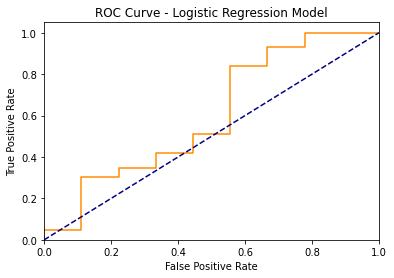

In [6]:
# Initiate the classifier model
classifier = LogisticRegression(max_iter=1000)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Save the scaler to the "Model_Saved" folder
# joblib.dump(X_scaler, f"Model_Saved/{name}_X_scaler.joblib")

# Fit, train and test the model
model = classifier.fit(X_train_scaled, y_train)
print('Healthy vs the rest')
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# Print classification report
target_names = ['Healthy', 'Cancer_Pre-cancer']
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot ROC curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.show()

In [7]:
column_name = ["Model_type", "Optimised", "Input", "Target", "Label_0", "Label_1", "Accuracy_score", "File_name"]
with open('performance.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(column_name)

In [12]:
def LogReg_default(X, y, filename, input_, target, label_0, label_1, csv_path):
    # Initiate the classifier model
    classifier = LogisticRegression(max_iter=1000)

    # Split the data into training and testing sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    X_scaler = StandardScaler().fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Save the scaler to the "Model_Saved" folder
    joblib.dump(X_scaler, f"Model_Saved/{filename}_X_scaler.joblib")

    # Fit, train and test the model
    model = classifier.fit(X_train_scaled, y_train)
    print(filename)
    print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
    print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    # Save the model to the "Model_Saved" folder
    joblib.dump(model, f"Model_Saved/{filename}.joblib")
    
    
    # Record performance in csv file
    data_row = ['Logistic_Regression', 'No', input_, target, label_0, label_1, accuracy, filename]
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(data_row)
    
    # Print classification report
    target_names = [label_0, label_1]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC curve
    y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.show()
    

LogRegDefault_input_1_target_1
Training Data Score: 0.9658536585365853
Testing Data Score: 0.7884615384615384
Accuracy: 78.85%
                      precision    recall  f1-score   support

             Healthy       0.38      0.33      0.35         9
BE_Pre-cancer_Cancer       0.86      0.88      0.87        43

            accuracy                           0.79        52
           macro avg       0.62      0.61      0.61        52
        weighted avg       0.78      0.79      0.78        52



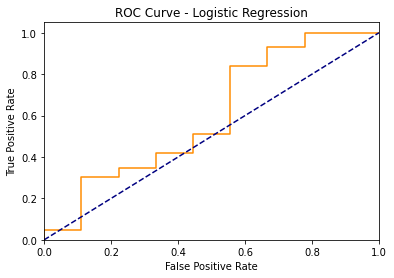

In [13]:
# X, y, filename, input_, target, label_0, label_1, csv_path

LogReg_default(X1, y1, 'LogRegDefault_input_1_target_1', '1', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv' )

LogRegDefault_input_1_target_2
Training Data Score: 0.9815950920245399
Testing Data Score: 0.5609756097560976
Accuracy: 56.10%
                   precision    recall  f1-score   support

               BE       0.55      0.55      0.55        20
Pre-cancer_Cancer       0.57      0.57      0.57        21

         accuracy                           0.56        41
        macro avg       0.56      0.56      0.56        41
     weighted avg       0.56      0.56      0.56        41



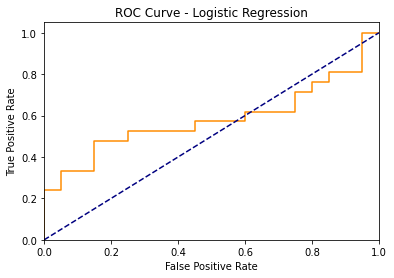

In [14]:
LogReg_default(X2, y2, 'LogRegDefault_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

In [15]:
# Create models using input 2: Clinical data only
data = pd.read_csv('../Data_Cleaned/clinical_only.csv')

# Reclassified: 1 vs 2,3,4 healthy vs all
df1= data
df1['target'] = df1['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 1, 'BE-ID': 1, 'BE-LGD': 1, 'NSE': 0})
df1 = df1[df1.target<2]

# Reclassified: 2 vs 3&4 BE low vs BE-HGD & EAC
df2 = data
df2['target'] = df2['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
df2 = df2[df2.target<2]

# Create X and y

X1 = df1.drop(['Patient Group', 'target'], axis=1)
y1 = df1['target']

X2 = df2.drop(['Patient Group', 'target'], axis=1)
y2 = df2['target']

LogRegDefault_input_2_target_1
Training Data Score: 0.824390243902439
Testing Data Score: 0.7692307692307693
Accuracy: 76.92%
                      precision    recall  f1-score   support

             Healthy       0.29      0.22      0.25         9
BE_Pre-cancer_Cancer       0.84      0.88      0.86        43

            accuracy                           0.77        52
           macro avg       0.57      0.55      0.56        52
        weighted avg       0.75      0.77      0.76        52



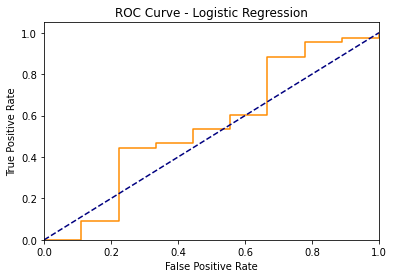

In [16]:
LogReg_default(X1, y1, 'LogRegDefault_input_2_target_1', '2', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv' )

LogRegDefault_input_2_target_2
Training Data Score: 0.558282208588957
Testing Data Score: 0.5121951219512195
Accuracy: 51.22%
                   precision    recall  f1-score   support

               BE       0.50      0.90      0.64        20
Pre-cancer_Cancer       0.60      0.14      0.23        21

         accuracy                           0.51        41
        macro avg       0.55      0.52      0.44        41
     weighted avg       0.55      0.51      0.43        41



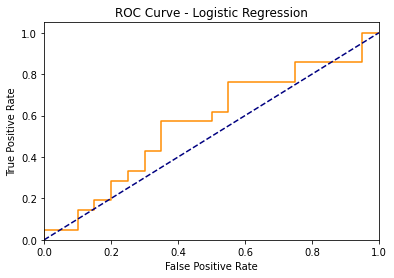

In [17]:
LogReg_default(X2, y2, 'LogRegDefault_input_2_target_2', '2', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

In [18]:
# Create models using input 3: Clinical data and proteins
data = pd.read_csv('../Data_Cleaned/clinic_proteins.csv')

# Reclassified: 1 vs 2,3,4 healthy vs all
df1= data
df1['target'] = df1['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 1, 'BE-ID': 1, 'BE-LGD': 1, 'NSE': 0})
df1 = df1[df1.target<2]

# Reclassified: 2 vs 3&4 BE low vs BE-HGD & EAC
df2 = data
df2['target'] = df2['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
df2 = df2[df2.target<2]

# Create X and y

X1 = df1.drop(['Patient Group', 'target'], axis=1)
y1 = df1['target']

X2 = df2.drop(['Patient Group', 'target'], axis=1)
y2 = df2['target']

LogRegDefault_input_3_target_1
Training Data Score: 0.9560975609756097
Testing Data Score: 0.7692307692307693
Accuracy: 76.92%
                      precision    recall  f1-score   support

             Healthy       0.33      0.33      0.33         9
BE_Pre-cancer_Cancer       0.86      0.86      0.86        43

            accuracy                           0.77        52
           macro avg       0.60      0.60      0.60        52
        weighted avg       0.77      0.77      0.77        52



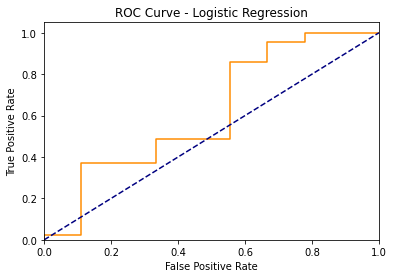

In [19]:
LogReg_default(X1, y1, 'LogRegDefault_input_3_target_1', '3', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv' )

LogRegDefault_input_3_target_2
Training Data Score: 0.9815950920245399
Testing Data Score: 0.5121951219512195
Accuracy: 51.22%
                   precision    recall  f1-score   support

               BE       0.50      0.50      0.50        20
Pre-cancer_Cancer       0.52      0.52      0.52        21

         accuracy                           0.51        41
        macro avg       0.51      0.51      0.51        41
     weighted avg       0.51      0.51      0.51        41



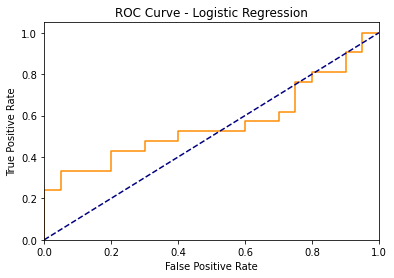

In [20]:
LogReg_default(X2, y2, 'LogRegDefault_input_3_target_2', '3', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

In [21]:
# Create models using input 4: Clinical data and protein ratios
data = pd.read_csv('../Data_Cleaned/clinic_ratios.csv')

# Reclassified: 1 vs 2,3,4 healthy vs all
df1= data
df1['target'] = df1['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 1, 'BE-ID': 1, 'BE-LGD': 1, 'NSE': 0})
df1 = df1[df1.target<2]

# Reclassified: 2 vs 3&4 BE low vs BE-HGD & EAC
df2 = data
df2['target'] = df2['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
df2 = df2[df2.target<2]

# Create X and y

X1 = df1.drop(['Patient Group', 'target'], axis=1)
y1 = df1['target']

X2 = df2.drop(['Patient Group', 'target'], axis=1)
y2 = df2['target']

LogRegDefault_input_4_target_1
Training Data Score: 0.8439024390243902
Testing Data Score: 0.7884615384615384
Accuracy: 78.85%
                      precision    recall  f1-score   support

             Healthy       0.38      0.33      0.35         9
BE_Pre-cancer_Cancer       0.86      0.88      0.87        43

            accuracy                           0.79        52
           macro avg       0.62      0.61      0.61        52
        weighted avg       0.78      0.79      0.78        52



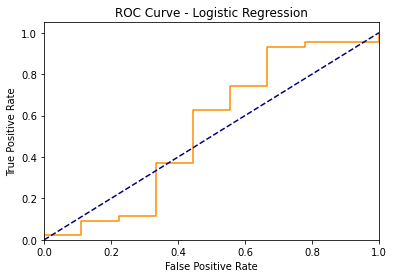

In [22]:
LogReg_default(X1, y1, 'LogRegDefault_input_4_target_1', '4', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv' )

LogRegDefault_input_4_target_2
Training Data Score: 0.7055214723926381
Testing Data Score: 0.5609756097560976
Accuracy: 56.10%
                   precision    recall  f1-score   support

               BE       0.54      0.75      0.63        20
Pre-cancer_Cancer       0.62      0.38      0.47        21

         accuracy                           0.56        41
        macro avg       0.58      0.57      0.55        41
     weighted avg       0.58      0.56      0.55        41



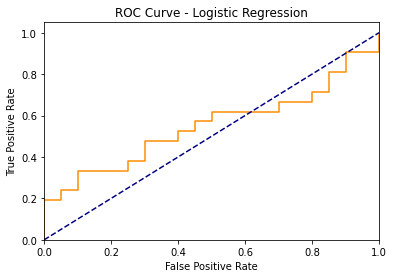

In [23]:
LogReg_default(X2, y2, 'LogRegDefault_input_4_target_2', '4', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

In [29]:
# Create function to optimise and run Logistic Regression model, save model and scaler.

def createLogReg(X, y, filename, input_, target, label_0, label_1, csv_path):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Define the parameter grid to search over
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    }

    # Create a Logistic Regression model
    model = LogisticRegression()

    # Use GridSearchCV to search for the best hyperparameters
    grid = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid.fit(X_train_scaled, y_train)

    # Print the best hyperparameters
    print('Best Hyperparameters:', grid.best_params_)

    # Train the model on the training data with the best hyperparameters
    best_model = grid.best_estimator_
    best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    # Save the scaler to the "Model_Saved" folder
    joblib.dump(X_scaler, f"Model_Saved/{filename}_X_scaler.joblib")

    # Save the model to the "Model_Saved" folder
    joblib.dump(best_model, f"Model_Saved/{filename}.joblib")
    
    # Record performance in csv file
    data_row = ['Logistic_Regression', 'Yes', input_, target, label_0, label_1, accuracy, filename]
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(data_row)
    
    # Print classification report
    target_names = [label_0, label_1]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC curve
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Logistic Regression')
    plt.show()
    

In [26]:
def switchCsv(csv_path):
    # Create models
    data = pd.read_csv(csv_path)

    # Reclassified: 1 vs 2,3,4 healthy vs all
    df1= data
    df1['target'] = df1['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 1, 'BE-ID': 1, 'BE-LGD': 1, 'NSE': 0})
    df1 = df1[df1.target<2]

    # Reclassified: 2 vs 3&4 BE low vs BE-HGD & EAC
    df2 = data
    df2['target'] = df2['Patient Group'].map({'BE-HGD': 1, 'EAC': 1, 'BE': 0, 'BE-ID': 0, 'BE-LGD': 0, 'NSE': 2})
    df2 = df2[df2.target<2]

    # Create X and y

    X1 = df1.drop(['Patient Group', 'target'], axis=1)
    y1 = df1['target']

    X2 = df2.drop(['Patient Group', 'target'], axis=1)
    y2 = df2['target']
    
    return(X1, y1, X2, y2)


In [27]:
switchCsv('../Data_Cleaned/train_test_set.csv')

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Accuracy: 78.85%
                      precision    recall  f1-score   support

             Healthy       0.33      0.22      0.27         9
BE_Pre-cancer_Cancer       0.85      0.91      0.88        43

            accuracy                           0.79        52
           macro avg       0.59      0.56      0.57        52
        weighted avg       0.76      0.79      0.77        52



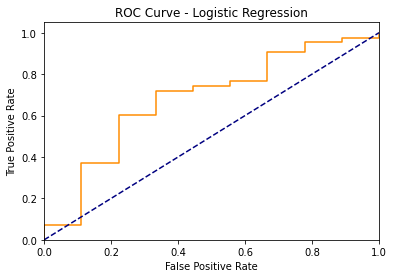

In [30]:
createLogReg(X1, y1, 'LogReg_input_1_target_1', '1', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Best Hyperparameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 70.73%
                   precision    recall  f1-score   support

               BE       0.72      0.84      0.78        25
Pre-cancer_Cancer       0.67      0.50      0.57        16

         accuracy                           0.71        41
        macro avg       0.70      0.67      0.67        41
     weighted avg       0.70      0.71      0.70        41



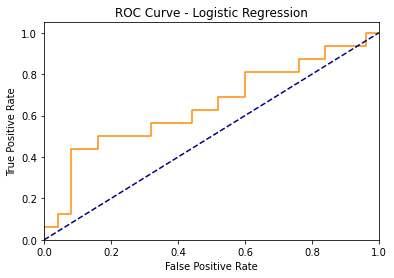

In [31]:
createLogReg(X2, y2, 'LogReg_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

### Optimised Logistic Regression: clinical data only ###

In [32]:
# Create optimised Logistic Regression models with input 2: clinical data only
switchCsv('../Data_Cleaned/clinical_only.csv')

(     Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0        41.40         1         0
 2                 55.0        30.26         0         1
 3                 68.0        30.40         0         1
 4                 57.0        23.02         0         1
 ..                 ...          ...       ...       ...
 252               71.0        30.60         0         1
 253               76.0        27.20         0         1
 254               49.0        35.60         0         1
 255               49.0         0.00         0         1
 256               86.0         0.00         0         1
 
 [257 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 252    1
 253    1
 254    1
 255    1
 256    0
 Name: target, Length: 257, dtype: int64,
      Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 78.85%
                      precision    recall  f1-score   support

             Healthy       0.33      0.22      0.27         9
BE_Pre-cancer_Cancer       0.85      0.91      0.88        43

            accuracy                           0.79        52
           macro avg       0.59      0.56      0.57        52
        weighted avg       0.76      0.79      0.77        52



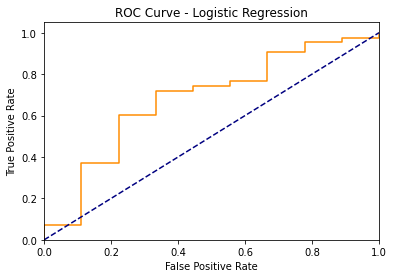

In [33]:
# Target 1: Healthy vs the rest
createLogReg(X1, y1, 'LogReg_input_2_target_1', '2', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 60.98%
                   precision    recall  f1-score   support

               BE       0.70      0.64      0.67        25
Pre-cancer_Cancer       0.50      0.56      0.53        16

         accuracy                           0.61        41
        macro avg       0.60      0.60      0.60        41
     weighted avg       0.62      0.61      0.61        41



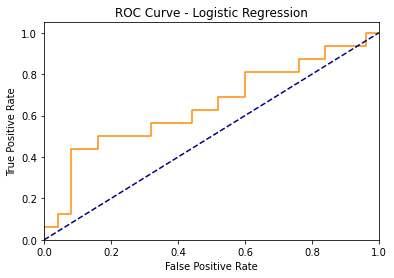

In [34]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createLogReg(X2, y2, 'LogReg_input_2_target_2', '2', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

### Optimised Logistic Regression: Clinic data and proteins ###

In [35]:
# Create optimised Logistic Regression models with input 3: clinical data and proteins
switchCsv('../Data_Cleaned/clinic_proteins.csv')

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Accuracy: 78.85%
                      precision    recall  f1-score   support

             Healthy       0.33      0.22      0.27         9
BE_Pre-cancer_Cancer       0.85      0.91      0.88        43

            accuracy                           0.79        52
           macro avg       0.59      0.56      0.57        52
        weighted avg       0.76      0.79      0.77        52



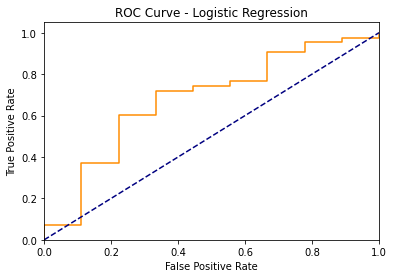

In [36]:
# Target 1: Healthy vs the rest
createLogReg(X1, y1, 'LogReg_input_3_target_1', '3', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 70.73%
                   precision    recall  f1-score   support

               BE       0.72      0.84      0.78        25
Pre-cancer_Cancer       0.67      0.50      0.57        16

         accuracy                           0.71        41
        macro avg       0.70      0.67      0.67        41
     weighted avg       0.70      0.71      0.70        41



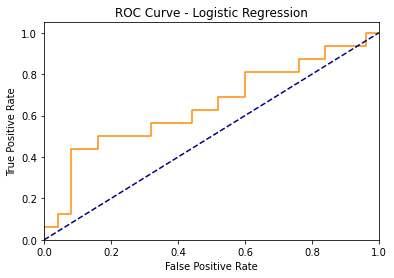

In [37]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createLogReg(X2, y2, 'LogReg_input_3_target_2', '3', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

### Optimised Logistic Regression: Clinic data and protein ratios

In [38]:
# Create optimised Logistic Regression models with input 4: clinical data and protein ratios
switchCsv('../Data_Cleaned/clinic_ratios.csv')

(     P00738_VTSIQDWVQK_Ratio_AAL  P01011_NLAVSQVVHK_Ratio_AAL  \
 0                      26.113753                     7.300140   
 1                      10.983476                     5.789630   
 2                       3.205467                     3.879468   
 3                      11.865011                    10.429828   
 4                      16.753812                     4.696277   
 ..                           ...                          ...   
 252                     2.630191                     1.269026   
 253                     2.479076                     1.442774   
 254                     5.202394                     1.402177   
 255                     1.073032                     0.974761   
 256                     2.429342                     1.305149   
 
      P01023_LPPNVVEESAR_Ratio_AAL  P02748_LSPIYNLVPVK_Ratio_AAL  \
 0                        2.076864                      3.305920   
 1                        5.416815                      2.223755   
 2

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 80.77%
                      precision    recall  f1-score   support

             Healthy       0.40      0.22      0.29         9
BE_Pre-cancer_Cancer       0.85      0.93      0.89        43

            accuracy                           0.81        52
           macro avg       0.63      0.58      0.59        52
        weighted avg       0.77      0.81      0.78        52



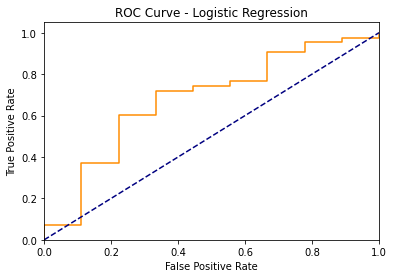

In [39]:
# Target 1: Healthy vs the rest
createLogReg(X1, y1, 'LogReg_input_4_target_1', '4', '1', 'Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 70.73%
                   precision    recall  f1-score   support

               BE       0.72      0.84      0.78        25
Pre-cancer_Cancer       0.67      0.50      0.57        16

         accuracy                           0.71        41
        macro avg       0.70      0.67      0.67        41
     weighted avg       0.70      0.71      0.70        41



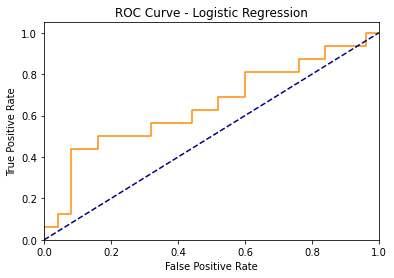

In [40]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createLogReg(X2, y2, 'LogReg_input_4_target_2', '4', '2', 'BE', "Pre-cancer_Cancer",'performance.csv' )

### Decision Tree Classifier ###

In [41]:
def createDecTree(X, y, filename, input_, target, label_0, label_1, csv_path):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Create a Decision Tree Classifier model
    model = DecisionTreeClassifier()

    # Set up a parameter grid to search over
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(3, 15),
        'min_samples_split': np.arange(2, 10),
        'min_samples_leaf': np.arange(1, 10),
        'max_features': ['auto', 'sqrt', 'log2']
    }

    # Perform a Randomized Search over the parameter grid
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
    search.fit(X_train_scaled, y_train)

    # Get the best parameters and model
    best_params = search.best_params_
    best_model = search.best_estimator_

    # Train the model on the training data
    best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test_scaled)
    
    # Save the scaler to the "Model_Saved" folder
    joblib.dump(X_scaler, f"Model_Saved/{filename}_X_scaler.joblib")

    # Save the model to the "Model_Saved" folder
    joblib.dump(best_model, f"Model_Saved/{filename}.joblib")

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    # Print out the best parameters
    print("Best parameters:", search.best_params_)
    
    # Record performance in csv file
    data_row = ['DecisionTree', 'Yes', input_, target, label_0, label_1, accuracy, filename]
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(data_row)
    
    # Print classification report
    target_names = [label_0, label_1]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC curve
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Decision Tree')
    plt.show()

### Optimised Decision Tree ###

In [43]:
switchCsv(path1)

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Accuracy: 76.92%
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}
                      precision    recall  f1-score   support

             Healthy       0.36      0.44      0.40         9
BE_Pre-cancer_Cancer       0.88      0.84      0.86        43

            accuracy                           0.77        52
           macro avg       0.62      0.64      0.63        52
        weighted avg       0.79      0.77      0.78        52



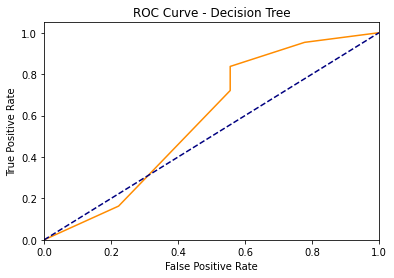

In [46]:
# Target 1: Healthy vs the rest
createDecTree(X1, y1, "DecTree_input_1_target_1",'1','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 53.66%
Best parameters: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'gini'}
                   precision    recall  f1-score   support

               BE       0.69      0.44      0.54        25
Pre-cancer_Cancer       0.44      0.69      0.54        16

         accuracy                           0.54        41
        macro avg       0.56      0.56      0.54        41
     weighted avg       0.59      0.54      0.54        41



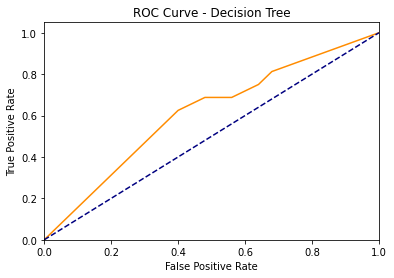

In [47]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createDecTree(X2, y2, 'DecTree_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Decision Tree: Clinical data only ###

In [48]:
switchCsv(path2)

(     Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0        41.40         1         0
 2                 55.0        30.26         0         1
 3                 68.0        30.40         0         1
 4                 57.0        23.02         0         1
 ..                 ...          ...       ...       ...
 252               71.0        30.60         0         1
 253               76.0        27.20         0         1
 254               49.0        35.60         0         1
 255               49.0         0.00         0         1
 256               86.0         0.00         0         1
 
 [257 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 252    1
 253    1
 254    1
 255    1
 256    0
 Name: target, Length: 257, dtype: int64,
      Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0

Accuracy: 76.92%
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'entropy'}
                      precision    recall  f1-score   support

             Healthy       0.36      0.44      0.40         9
BE_Pre-cancer_Cancer       0.88      0.84      0.86        43

            accuracy                           0.77        52
           macro avg       0.62      0.64      0.63        52
        weighted avg       0.79      0.77      0.78        52



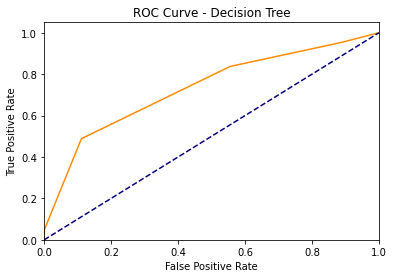

In [49]:
# Target 1: Healthy vs the rest
createDecTree(X1, y1, "DecTree_input_2_target_1",'2','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 56.10%
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'gini'}
                   precision    recall  f1-score   support

               BE       0.68      0.52      0.59        25
Pre-cancer_Cancer       0.45      0.62      0.53        16

         accuracy                           0.56        41
        macro avg       0.57      0.57      0.56        41
     weighted avg       0.59      0.56      0.57        41



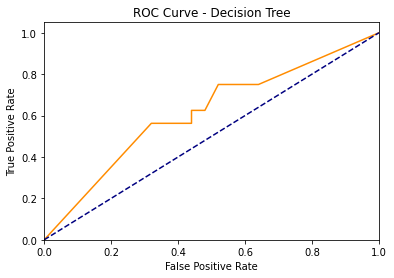

In [50]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createDecTree(X2, y2, 'DecTree_input_2_target_2', '2', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Decision Tree: Clinical data and proteins ###

In [51]:
switchCsv(path3)

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Accuracy: 73.08%
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}
                      precision    recall  f1-score   support

             Healthy       0.14      0.11      0.12         9
BE_Pre-cancer_Cancer       0.82      0.86      0.84        43

            accuracy                           0.73        52
           macro avg       0.48      0.49      0.48        52
        weighted avg       0.70      0.73      0.72        52



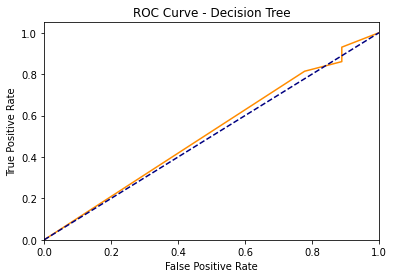

In [52]:
# Target 1: Healthy vs the rest
createDecTree(X1, y1, "DecTree_input_3_target_1",'3','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 65.85%
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}
                   precision    recall  f1-score   support

               BE       0.76      0.64      0.70        25
Pre-cancer_Cancer       0.55      0.69      0.61        16

         accuracy                           0.66        41
        macro avg       0.66      0.66      0.65        41
     weighted avg       0.68      0.66      0.66        41



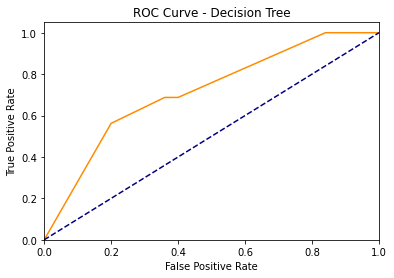

In [53]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createDecTree(X2, y2, 'DecTree_input_3_target_2', '3', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Decision Tree: Clinical data and protein ratios ###

In [54]:
switchCsv(path4)

(     P00738_VTSIQDWVQK_Ratio_AAL  P01011_NLAVSQVVHK_Ratio_AAL  \
 0                      26.113753                     7.300140   
 1                      10.983476                     5.789630   
 2                       3.205467                     3.879468   
 3                      11.865011                    10.429828   
 4                      16.753812                     4.696277   
 ..                           ...                          ...   
 252                     2.630191                     1.269026   
 253                     2.479076                     1.442774   
 254                     5.202394                     1.402177   
 255                     1.073032                     0.974761   
 256                     2.429342                     1.305149   
 
      P01023_LPPNVVEESAR_Ratio_AAL  P02748_LSPIYNLVPVK_Ratio_AAL  \
 0                        2.076864                      3.305920   
 1                        5.416815                      2.223755   
 2

Accuracy: 69.23%
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}
                      precision    recall  f1-score   support

             Healthy       0.11      0.11      0.11         9
BE_Pre-cancer_Cancer       0.81      0.81      0.81        43

            accuracy                           0.69        52
           macro avg       0.46      0.46      0.46        52
        weighted avg       0.69      0.69      0.69        52



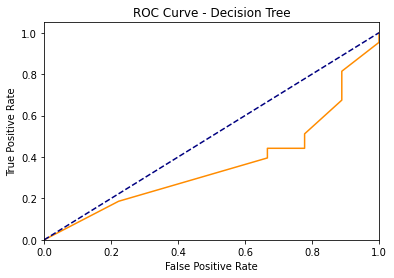

In [55]:
# Target 1: Healthy vs the rest
createDecTree(X1, y1, "DecTree_input_4_target_1",'4','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 60.98%
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}
                   precision    recall  f1-score   support

               BE       0.66      0.76      0.70        25
Pre-cancer_Cancer       0.50      0.38      0.43        16

         accuracy                           0.61        41
        macro avg       0.58      0.57      0.57        41
     weighted avg       0.59      0.61      0.60        41



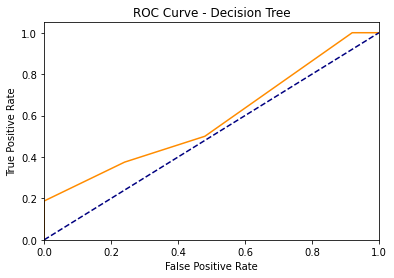

In [56]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createDecTree(X2, y2, 'DecTree_input_4_target_2', '4', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### SVM ###

In [61]:
def createSVM(X, y, filename, input_, target, label_0, label_1, csv_path):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Create an SVM model with a linear kernel
    model = SVC(kernel='linear', probability=True)

    # Set up a parameter grid to search over
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.1, 1, 10, 100],
    }

    # Perform a Grid Search over the parameter grid
    search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
    search.fit(X_train_scaled, y_train)

    # Get the best parameters and model
    best_params = search.best_params_
    best_model = search.best_estimator_

    # Train the model on the training data
    best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    # Print the best parameters
    print('Best Parameters:', best_params)
    
    # Save the scaler to the "Model_Saved" folder
    joblib.dump(X_scaler, f"Model_Saved/{filename}_X_scaler.joblib")

    # Save the model to the "Model_Saved" folder
    joblib.dump(best_model, f"Model_Saved/{filename}.joblib")
    
     # Record performance in csv file
    data_row = ['SVM', 'Yes', input_, target, label_0, label_1, accuracy, filename]
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(data_row)
    
    # Print classification report
    target_names = [label_0, label_1]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC curve
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.show()
    

### Optimised SVM ###

In [62]:
switchCsv(path1)

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Accuracy: 84.62%
Best Parameters: {'C': 0.1, 'gamma': 0.1}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



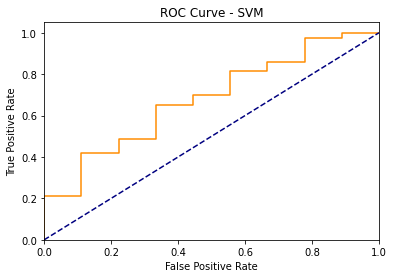

In [63]:
# Target 1: Healthy vs the rest
createSVM(X1, y1, "SVM_input_1_target_1",'1','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 65.85%
Best Parameters: {'C': 0.01, 'gamma': 0.1}
                   precision    recall  f1-score   support

               BE       0.65      0.96      0.77        25
Pre-cancer_Cancer       0.75      0.19      0.30        16

         accuracy                           0.66        41
        macro avg       0.70      0.57      0.54        41
     weighted avg       0.69      0.66      0.59        41



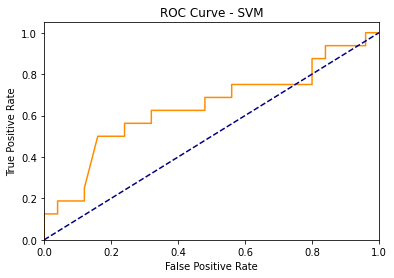

In [64]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createSVM(X2, y2, 'SVM_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised SVM: Clinical data only ###

In [65]:
switchCsv(path2)

(     Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0        41.40         1         0
 2                 55.0        30.26         0         1
 3                 68.0        30.40         0         1
 4                 57.0        23.02         0         1
 ..                 ...          ...       ...       ...
 252               71.0        30.60         0         1
 253               76.0        27.20         0         1
 254               49.0        35.60         0         1
 255               49.0         0.00         0         1
 256               86.0         0.00         0         1
 
 [257 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 252    1
 253    1
 254    1
 255    1
 256    0
 Name: target, Length: 257, dtype: int64,
      Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0

Accuracy: 84.62%
Best Parameters: {'C': 0.1, 'gamma': 0.1}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



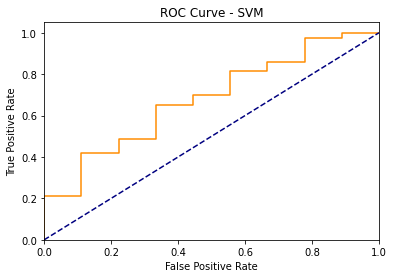

In [66]:
# Target 1: Healthy vs the rest
createSVM(X1, y1, "SVM_input_2_target_1",'2','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 65.85%
Best Parameters: {'C': 0.01, 'gamma': 0.1}
                   precision    recall  f1-score   support

               BE       0.65      0.96      0.77        25
Pre-cancer_Cancer       0.75      0.19      0.30        16

         accuracy                           0.66        41
        macro avg       0.70      0.57      0.54        41
     weighted avg       0.69      0.66      0.59        41



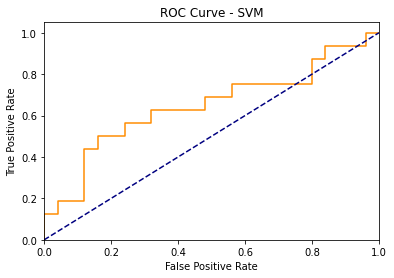

In [67]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createSVM(X2, y2, 'SVM_input_2_target_2', '2', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised SVM: Clinical data and proteins ###

In [68]:
switchCsv(path3)

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Accuracy: 84.62%
Best Parameters: {'C': 0.1, 'gamma': 0.1}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



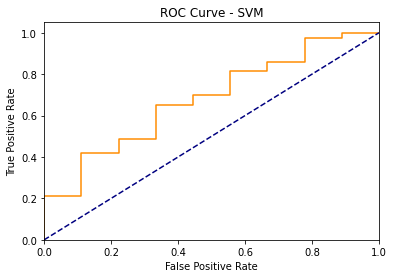

In [69]:
# Target 1: Healthy vs the rest
createSVM(X1, y1, "SVM_input_3_target_1",'3','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 65.85%
Best Parameters: {'C': 0.01, 'gamma': 0.1}
                   precision    recall  f1-score   support

               BE       0.65      0.96      0.77        25
Pre-cancer_Cancer       0.75      0.19      0.30        16

         accuracy                           0.66        41
        macro avg       0.70      0.57      0.54        41
     weighted avg       0.69      0.66      0.59        41



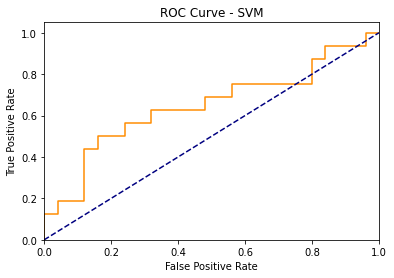

In [70]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createSVM(X2, y2, 'SVM_input_3_target_2', '3', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised SVM: Clinical data and protein ratios ###

In [71]:
switchCsv(path4)

(     P00738_VTSIQDWVQK_Ratio_AAL  P01011_NLAVSQVVHK_Ratio_AAL  \
 0                      26.113753                     7.300140   
 1                      10.983476                     5.789630   
 2                       3.205467                     3.879468   
 3                      11.865011                    10.429828   
 4                      16.753812                     4.696277   
 ..                           ...                          ...   
 252                     2.630191                     1.269026   
 253                     2.479076                     1.442774   
 254                     5.202394                     1.402177   
 255                     1.073032                     0.974761   
 256                     2.429342                     1.305149   
 
      P01023_LPPNVVEESAR_Ratio_AAL  P02748_LSPIYNLVPVK_Ratio_AAL  \
 0                        2.076864                      3.305920   
 1                        5.416815                      2.223755   
 2

Accuracy: 84.62%
Best Parameters: {'C': 0.1, 'gamma': 0.1}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



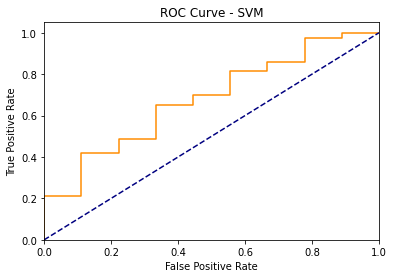

In [72]:
# Target 1: Healthy vs the rest
createSVM(X1, y1, "SVM_input_4_target_1",'4','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 65.85%
Best Parameters: {'C': 0.01, 'gamma': 0.1}
                   precision    recall  f1-score   support

               BE       0.65      0.96      0.77        25
Pre-cancer_Cancer       0.75      0.19      0.30        16

         accuracy                           0.66        41
        macro avg       0.70      0.57      0.54        41
     weighted avg       0.69      0.66      0.59        41



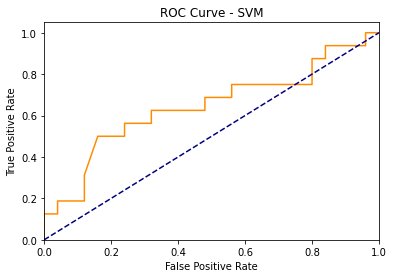

In [73]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createSVM(X2, y2, 'SVM_input_4_target_2', '4', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

## Random Forest ##

In [74]:
def createRandomForest(X, y, filename, input_, target, label_0, label_1, csv_path): 
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    # Create a random forest model
    model = RandomForestClassifier()

    # Create a GridSearchCV object
    search = GridSearchCV(model, param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object to the data
    search.fit(X_train_scaled, y_train)

    # Get the best parameters and model
    best_params = search.best_params_
    best_model = search.best_estimator_

    # Train the model on the training data
    best_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    # Print out the best parameters
    print("Best parameters:", search.best_params_)
    
    # Record performance in csv file
    data_row = ['RandomForest', 'Yes', input_, target, label_0, label_1, accuracy, filename]
    with open(csv_path, 'a') as f:
        writer = csv.writer(f)
        writer.writerow(data_row)
    
    # Print classification report
    target_names = [label_0, label_1]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC curve
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.show()

### Optimised Random Forest ###

In [75]:
switchCsv(path1)

(        O95445_AAL     P00450_AAL     P00734_AAL    P00736_AAL    P00738_AAL  \
 0    231901.565681  531675.915634  130229.593177  4.574278e+07  7.427876e+07   
 1    225768.925899  392680.876091  147433.340040  4.629934e+07  3.240003e+07   
 2    196448.722270  383654.430349   81930.599409  4.418331e+07  1.274380e+07   
 3    513410.263339  665023.074428  168785.312885  8.292568e+07  3.314564e+07   
 4    314617.377724  570847.628329  142913.865712  5.173620e+07  4.496642e+07   
 ..             ...            ...            ...           ...           ...   
 252  212909.415400  409214.656100   46791.487300  1.044341e+05  1.897595e+07   
 253  264552.337400  443446.696400   53288.416120  1.013776e+05  1.906240e+07   
 254  311888.143400  779222.794900   59896.271210  1.419347e+05  3.572879e+07   
 255  262882.689100  317187.906000   38295.881410  1.148620e+05  8.537090e+06   
 256  228257.769700  361048.534200   37698.010650  8.241404e+04  1.884250e+07   
 
        P00747_AAL     P00

Accuracy: 84.62%
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



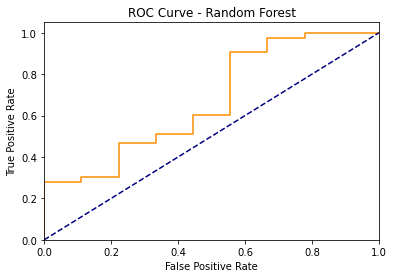

In [76]:
# Target 1: Healthy vs the rest
createRandomForest(X1, y1, "RF_input_1_target_1",'1','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 53.66%
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
                   precision    recall  f1-score   support

               BE       0.67      0.48      0.56        25
Pre-cancer_Cancer       0.43      0.62      0.51        16

         accuracy                           0.54        41
        macro avg       0.55      0.55      0.54        41
     weighted avg       0.58      0.54      0.54        41



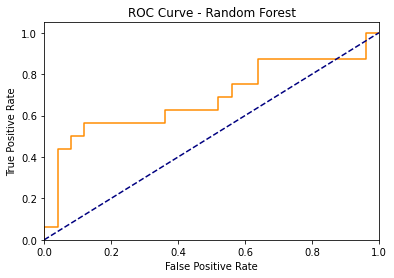

In [77]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createRandomForest(X2, y2, 'RF_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Random Forest: Clinical data only ###

In [78]:
switchCsv(path2)

(     Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0        41.40         1         0
 2                 55.0        30.26         0         1
 3                 68.0        30.40         0         1
 4                 57.0        23.02         0         1
 ..                 ...          ...       ...       ...
 252               71.0        30.60         0         1
 253               76.0        27.20         0         1
 254               49.0        35.60         0         1
 255               49.0         0.00         0         1
 256               86.0         0.00         0         1
 
 [257 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 252    1
 253    1
 254    1
 255    1
 256    0
 Name: target, Length: 257, dtype: int64,
      Age at Collection  BMI (kg/m2)  Gender_F  Gender_M
 0                 63.0        31.46         0         1
 1                 69.0

Accuracy: 80.77%
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
                      precision    recall  f1-score   support

             Healthy       0.33      0.11      0.17         9
BE_Pre-cancer_Cancer       0.84      0.95      0.89        43

            accuracy                           0.81        52
           macro avg       0.59      0.53      0.53        52
        weighted avg       0.75      0.81      0.77        52



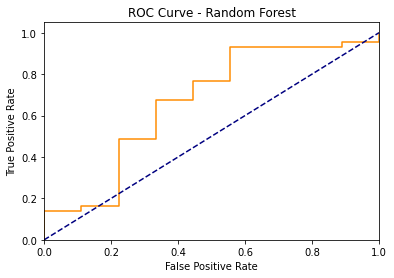

In [79]:
# Target 1: Healthy vs the rest
createRandomForest(X1, y1, "RF_input_2_target_1",'2','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 73.17%
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
                   precision    recall  f1-score   support

               BE       0.85      0.68      0.76        25
Pre-cancer_Cancer       0.62      0.81      0.70        16

         accuracy                           0.73        41
        macro avg       0.73      0.75      0.73        41
     weighted avg       0.76      0.73      0.73        41



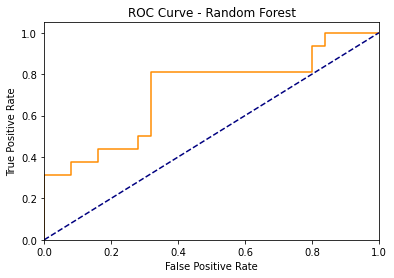

In [80]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createRandomForest(X2, y2, 'RF_input_2_target_2', '2', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Random Forest: Clinical data and proteins ###

Accuracy: 84.62%
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
                      precision    recall  f1-score   support

             Healthy       1.00      0.11      0.20         9
BE_Pre-cancer_Cancer       0.84      1.00      0.91        43

            accuracy                           0.85        52
           macro avg       0.92      0.56      0.56        52
        weighted avg       0.87      0.85      0.79        52



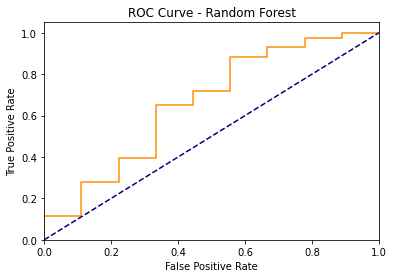

In [81]:
# Target 1: Healthy vs the rest
createRandomForest(X1, y1, "RF_input_3_target_1",'3','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 58.54%
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
                   precision    recall  f1-score   support

               BE       0.68      0.60      0.64        25
Pre-cancer_Cancer       0.47      0.56      0.51        16

         accuracy                           0.59        41
        macro avg       0.58      0.58      0.58        41
     weighted avg       0.60      0.59      0.59        41



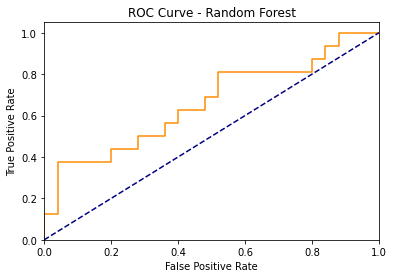

In [82]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createRandomForest(X2, y2, 'RF_input_3_target_2', '3', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

### Optimised Random Forest: Clinical data and protein ratios ###

Accuracy: 84.62%
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
                      precision    recall  f1-score   support

             Healthy       0.67      0.22      0.33         9
BE_Pre-cancer_Cancer       0.86      0.98      0.91        43

            accuracy                           0.85        52
           macro avg       0.76      0.60      0.62        52
        weighted avg       0.82      0.85      0.81        52



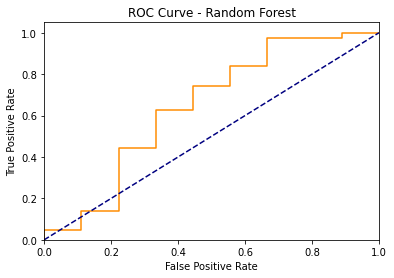

In [83]:
# Target 1: Healthy vs the rest
createRandomForest(X1, y1, "RF_input_1_target_1",'1','1','Healthy', "BE_Pre-cancer_Cancer",'performance.csv')

Accuracy: 68.29%
Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
                   precision    recall  f1-score   support

               BE       0.77      0.68      0.72        25
Pre-cancer_Cancer       0.58      0.69      0.63        16

         accuracy                           0.68        41
        macro avg       0.68      0.68      0.68        41
     weighted avg       0.70      0.68      0.69        41



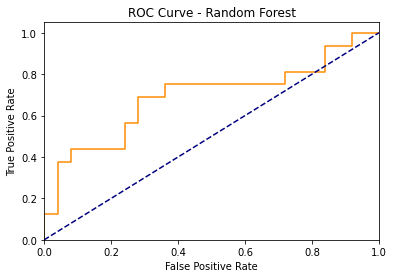

In [84]:
# Target 2: BE low/no dysplasia vs BE High dysplasia or Cancer
createRandomForest(X2, y2, 'RF_input_1_target_2', '1', '2', 'BE', "Pre-cancer_Cancer",'performance.csv')

In [20]:
model_df = pd.read_csv('performance.csv')
model_df = model_df.sort_values('Accuracy_score', ascending = False)
model_df

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
35,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
27,SVM,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_1_target_1
29,SVM,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_2_target_1
31,SVM,Yes,3,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_3_target_1
33,SVM,Yes,4,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_4_target_1
26,SVM,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_1_target_1
41,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
39,RandomForest,Yes,3,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_3_target_1
16,Logistic_Regression,Yes,4,1,Healthy,BE_Pre-cancer_Cancer,0.807692,LogReg_input_4_target_1
37,RandomForest,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.807692,RF_input_2_target_1


In [8]:
t1 = model_df[model_df['Target'] == 1]
t1 = t1.sort_values('Accuracy_score', ascending=False)
t1.head()


,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
41,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
39,RandomForest,Yes,3,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_3_target_1
35,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
33,SVM,Yes,4,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_4_target_1
31,SVM,Yes,3,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_3_target_1


In [9]:
t2 = model_df[model_df['Target'] == 2]
t2 = t2.sort_values('Accuracy_score', ascending=False)
t2.head()

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
38,RandomForest,Yes,2,2,BE,Pre-cancer_Cancer,0.731707,RF_input_2_target_2
11,Logistic_Regression,Yes,1,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_1_target_2
15,Logistic_Regression,Yes,3,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_3_target_2
17,Logistic_Regression,Yes,4,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_4_target_2
42,RandomForest,Yes,1,2,BE,Pre-cancer_Cancer,0.682927,RF_input_1_target_2


In [12]:
model1 = t1[t1['Input']== 2]
model1 = model1.sort_values('Accuracy_score', ascending=False)
model1

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
29,SVM,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_2_target_1
37,RandomForest,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.807692,RF_input_2_target_1
12,Logistic_Regression,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.788462,LogReg_input_2_target_1
3,Logistic_Regression,No,2,1,Healthy,BE_Pre-cancer_Cancer,0.769231,LogRegDefault_input_2_target_1
20,DecisionTree,Yes,2,1,Healthy,BE_Pre-cancer_Cancer,0.769231,DecTree_input_2_target_1


In [14]:
model2 = t1[t1['Input']!= 2]
model2 = model2.sort_values('Accuracy_score', ascending=False)
model2.head()

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
41,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
35,RandomForest,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,RF_input_1_target_1
33,SVM,Yes,4,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_4_target_1
31,SVM,Yes,3,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_3_target_1
27,SVM,Yes,1,1,Healthy,BE_Pre-cancer_Cancer,0.846154,SVM_input_1_target_1


In [15]:
model3 = t2[t2['Input']== 2]
model3 = model3.sort_values('Accuracy_score', ascending=False)
model3.head()

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
38,RandomForest,Yes,2,2,BE,Pre-cancer_Cancer,0.731707,RF_input_2_target_2
30,SVM,Yes,2,2,BE,Pre-cancer_Cancer,0.658537,SVM_input_2_target_2
13,Logistic_Regression,Yes,2,2,BE,Pre-cancer_Cancer,0.609756,LogReg_input_2_target_2
21,DecisionTree,Yes,2,2,BE,Pre-cancer_Cancer,0.560976,DecTree_input_2_target_2


In [17]:
model4 = t2[t2['Input']!= 2]
model4 = model4.sort_values('Accuracy_score', ascending=False)
model4.head()

,Model_type,Optimised,Input,Target,Label_0,Label_1,Accuracy_score,File_name
11,Logistic_Regression,Yes,1,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_1_target_2
15,Logistic_Regression,Yes,3,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_3_target_2
17,Logistic_Regression,Yes,4,2,BE,Pre-cancer_Cancer,0.707317,LogReg_input_4_target_2
42,RandomForest,Yes,1,2,BE,Pre-cancer_Cancer,0.682927,RF_input_1_target_2
28,SVM,Yes,1,2,BE,Pre-cancer_Cancer,0.658537,SVM_input_1_target_2
